# Warning :
# Do "File -> Save a copy in Drive" before you start modifying the notebook, otherwise your modifications will not be saved.


In [1]:
import argparse
import os
import time

import PIL
from PIL import Image

import numpy as np
import torchvision
import pickle

import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.utils.data
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.autograd import Variable

from sklearn.svm import LinearSVC
from torchvision.models import VGG16_Weights


# Partie 1 : Architecture VGG16

In [2]:
#!wget https://github.com/cdancette/deep-learning-polytech-tp6-7/raw/master/tp8/imagenet_classes.pkl
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/3-a/imagenet_classes.pkl

# Bonus : Classifiez des exemples avec vgg16 et commentez le résultat dans votre rapport.
!wget --content-disposition https://unsplash.com/photos/gKXKBY-C-Dk/download?force=true -O cat.jpg
!wget --content-disposition https://unsplash.com/photos/qO-PIF84Vxg/download?force=true -O dog.jpg
!wget --content-disposition https://unsplash.com/photos/ny_5l4QKBnE/download?force=true -O antelope.jpg
!wget --content-disposition https://unsplash.com/photos/jr6Ll1YAPvQ/download?force=true -O plate.jpg

--2024-12-01 18:48:08--  https://github.com/rdfia/rdfia.github.io/raw/master/data/3-a/imagenet_classes.pkl
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/3-a/imagenet_classes.pkl [following]
--2024-12-01 18:48:08--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/3-a/imagenet_classes.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35454 (35K) [text/plain]
Saving to: ‘imagenet_classes.pkl’

imagenet_classes.pk 100%[===================>]  34.62K  --.-KB/s    in 0.008s  

2024-12-01 18:48:08 (4.31 MB/s) - ‘imagenet_classes.pkl’ saved [35454

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 82.0MB/s]


Predicted class: Egyptian cat


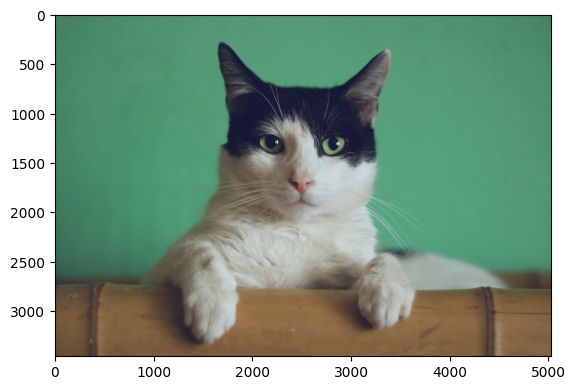

In [3]:
nameim = "cat"+".jpg"
img = Image.open(nameim)
plt.imshow(img)  # (5026, 3458)

# Loading ImageNet classes
imagenet_classes = pickle.load(open('imagenet_classes.pkl', 'rb'))

# Normalization
img = img.resize((224, 224), Image.BILINEAR)  # (224, 224)
img = np.array(img, dtype=np.float32) / 255  # (224, 224, 3)
img = img.transpose((2, 0, 1))  # (3, 224, 224)

# ImageNet mean/std
mu = torch.Tensor([0.485, 0.456, 0.406])
sigma = torch.Tensor([0.229, 0.224, 0.225])
# Expand mu & sigma to match image size
# YOUR CODE HERE
mu = mu[:, None, None]  # (3, 1, 1)
sigma = sigma[:, None, None]  # (3, 1, 1)

# compute the normalized image with mean ImageNet image
img = (torch.Tensor(img) - mu) / sigma  # (3, 224, 224)

# Loding pre-trained VGG
# vgg16 = torchvision.models.vgg16(pretrained=True)  The parameter 'pretrained' is deprecated
vgg16 = torchvision.models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
vgg16.eval() # WHY THAT ? This puts the model in evaluation mode, which turns off dropout and batch normalization

# Forward pass on VGG
img = np.expand_dims(img, 0)  # Expands to match the input shape (1, 3, 224, 224)
x = torch.Tensor(img)
# TODO
y = vgg16(x).detach()  # Perform forward pass
y = y.numpy() # transformation en array numpy

# Get prediction (i.e., ImageNet class label)
# YOUR CODE HERE
predicted_class = np.argmax(y)
label = imagenet_classes[predicted_class]
print("Predicted class:", label)


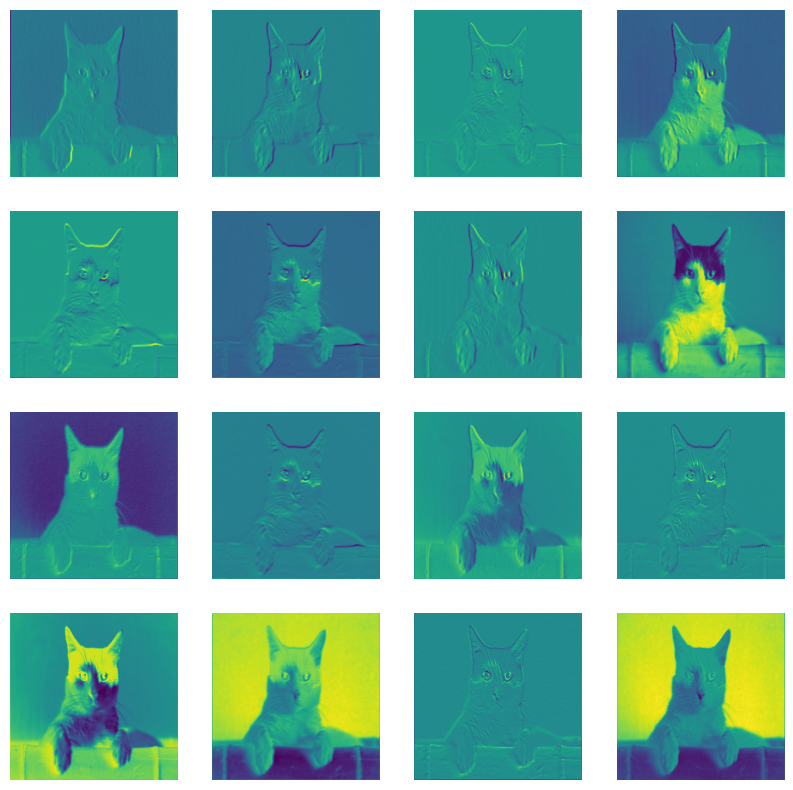

In [15]:
# Get the activation map of first layer
layer = vgg16.features[0]
activation = layer(x)
plt.figure(figsize=(10,10))
for i in range(0,16):
  plt.subplot(4, 4, i+1)
  plt.imshow(activation.squeeze(0)[i].detach().numpy())
  plt.axis('off')
plt.show()

Predicted class: wire-haired fox terrier


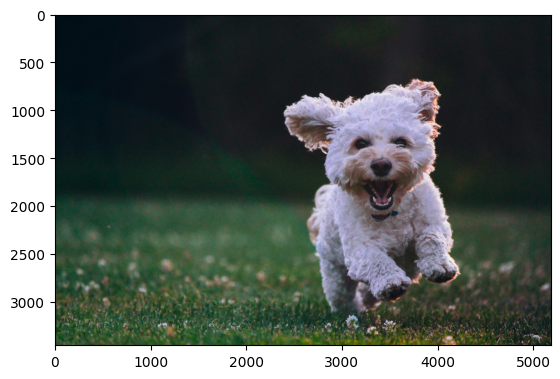

In [ ]:
nameim = "dog"+".jpg"
img = Image.open(nameim)
plt.imshow(img)

# Loading ImageNet classes
imagenet_classes = pickle.load(open('imagenet_classes.pkl', 'rb'))

# Normalization
img = img.resize((224, 224), Image.BILINEAR)
img = np.array(img, dtype=np.float32) / 255
img = img.transpose((2, 0, 1)

# ImageNet mean/std
mu = torch.Tensor([0.485, 0.456, 0.406])
sigma = torch.Tensor([0.229, 0.224, 0.225])
# Expand mu & sigma to match image size
mu = mu[:, None, None]
sigma = sigma[:, None, None]

# compute the normalized image with mean ImageNet image
img = (torch.Tensor(img) - mu) / sigma

# Forward pass on VGG
img = np.expand_dims(img, 0)
x = torch.Tensor(img)
y = vgg16(x).detach()
y = y.numpy()

# Get prediction
predicted_class = np.argmax(y)
label = imagenet_classes[predicted_class]
print("Predicted class:", label)

Predicted class: hartebeest


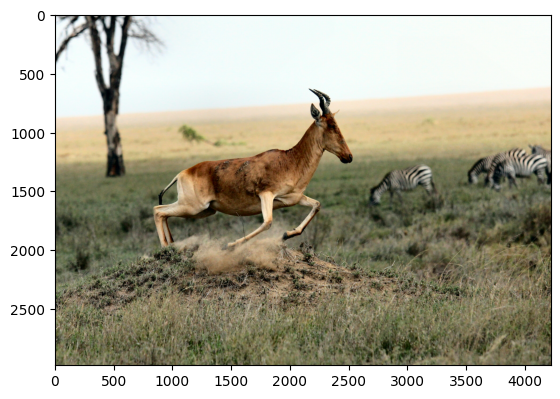

In [ ]:
nameim = "antelope"+".jpg"
img = Image.open(nameim)
plt.imshow(img)

# Loading ImageNet classes
imagenet_classes = pickle.load(open('imagenet_classes.pkl', 'rb'))

# Normalization
img = img.resize((224, 224), Image.BILINEAR)
img = np.array(img, dtype=np.float32) / 255
img = img.transpose((2, 0, 1))
# ImageNet mean/std
mu = torch.Tensor([0.485, 0.456, 0.406])
sigma = torch.Tensor([0.229, 0.224, 0.225])
# Expand mu & sigma to match image size
mu = mu[:, None, None]
sigma = sigma[:, None, None]

# compute the normalized image with mean ImageNet image
img = (torch.Tensor(img) - mu) / sigma

# Forward pass on VGG
img = np.expand_dims(img, 0)
x = torch.Tensor(img)
y = vgg16(x).detach()
y = y.numpy()

# Get prediction
predicted_class = np.argmax(y)
label = imagenet_classes[predicted_class]
print("Predicted class:", label)

Predicted class: burrito


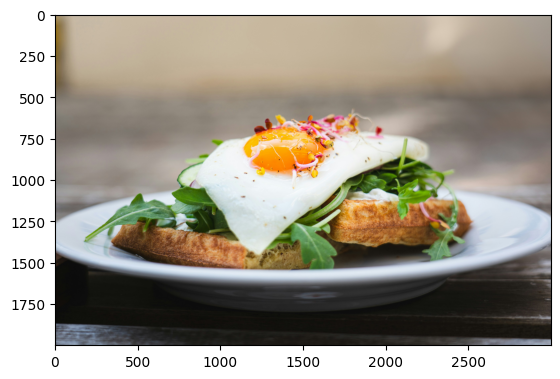

In [ ]:
nameim = "plate"+".jpg"
img = Image.open(nameim)
plt.imshow(img)

# Loading ImageNet classes
imagenet_classes = pickle.load(open('imagenet_classes.pkl', 'rb'))

# Normalization
img = img.resize((224, 224), Image.BILINEAR)
img = np.array(img, dtype=np.float32) / 255
img = img.transpose((2, 0, 1))
# ImageNet mean/std
mu = torch.Tensor([0.485, 0.456, 0.406])
sigma = torch.Tensor([0.229, 0.224, 0.225])
# Expand mu & sigma to match image size
mu = mu[:, None, None]
sigma = sigma[:, None, None]

# compute the normalized image with mean ImageNet image
img = (torch.Tensor(img) - mu) / sigma

# Forward pass on VGG
img = np.expand_dims(img, 0)
x = torch.Tensor(img)
y = vgg16(x).detach()
y = y.numpy()

# Get prediction
predicted_class = np.argmax(y)
label = imagenet_classes[predicted_class]
print("Predicted class:", label)

# Partie 2: Transfer Learning avec VGG16 sur 15 Scene

In [4]:
#!wget https://github.com/cdancette/deep-learning-polytech-tp6-7/raw/master/tp8/15ScenesData.zip
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/3-a/15ScenesData.zip

!unzip 15ScenesData.zip

--2024-12-01 18:48:37--  https://github.com/rdfia/rdfia.github.io/raw/master/data/3-a/15ScenesData.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/3-a/15ScenesData.zip [following]
--2024-12-01 18:48:38--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/3-a/15ScenesData.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86520868 (83M) [application/zip]
Saving to: ‘15ScenesData.zip’

15ScenesData.zip    100%[===================>]  82.51M   316MB/s    in 0.3s    

2024-12-01 18:48:38 (316 MB/s) - ‘15ScenesData.zip’ saved [86520868/86520868]

In [5]:
ls 15SceneData/test/bedroom/

image_0003.jpg  image_0035.jpg  image_0068.jpg  image_0103.jpg  image_0141.jpg  image_0182.jpg
image_0004.jpg  image_0037.jpg  image_0069.jpg  image_0104.jpg  image_0142.jpg  image_0189.jpg
image_0006.jpg  image_0039.jpg  image_0071.jpg  image_0112.jpg  image_0144.jpg  image_0190.jpg
image_0007.jpg  image_0040.jpg  image_0073.jpg  image_0113.jpg  image_0148.jpg  image_0191.jpg
image_0008.jpg  image_0042.jpg  image_0074.jpg  image_0114.jpg  image_0150.jpg  image_0192.jpg
image_0011.jpg  image_0043.jpg  image_0077.jpg  image_0115.jpg  image_0152.jpg  image_0195.jpg
image_0013.jpg  image_0047.jpg  image_0080.jpg  image_0117.jpg  image_0153.jpg  image_0196.jpg
image_0014.jpg  image_0049.jpg  image_0081.jpg  image_0118.jpg  image_0156.jpg  image_0200.jpg
image_0016.jpg  image_0050.jpg  image_0082.jpg  image_0119.jpg  image_0157.jpg  image_0202.jpg
image_0017.jpg  image_0052.jpg  image_0084.jpg  image_0120.jpg  image_0158.jpg  image_0203.jpg
image_0018.jpg  image_0053.jpg  image_0086.jpg  im

In [6]:
class VGG16relu7(nn.Module):
    def __init__(self):
        super(VGG16relu7, self).__init__()
        # Copy the entire convolutional part
        vgg16 = torchvision.models.vgg16(weights=VGG16_Weights.IMAGENET1K_V1)
        self.features = nn.Sequential(*list(vgg16.features.children()))
        # Keep a piece of the classifier: -2 to stop at relu7
        self.classifier = nn.Sequential(*list(vgg16.classifier.children())[:-2])

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x


In [7]:
PRINT_INTERVAL = 50
CUDA = True

def get_dataset(batch_size, path):

    # This function expands 3 times a gray level image
    # to transform it into an image RGB. Use it with transform.Lambda
    def duplicateChannel(img):
        img = img.convert('L')
        np_img = np.array(img, dtype=np.uint8)
        np_img = np.dstack([np_img, np_img, np_img])
        img = Image.fromarray(np_img, 'RGB')
        return img
    def resizeImage(img):
      return img.resize((224,224), Image.BILINEAR)

    #####################
    ## YOUR CODE HERE  ##
    #####################
    # Add pre-processing
    train_dataset = datasets.ImageFolder(path+'/train',
        transform=transforms.Compose([ # Pre-processing TODO: duplicateChannel(), resizeImage(), toTensor(), Normalize ()
            transforms.Lambda(duplicateChannel),
            transforms.Lambda(resizeImage),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ]))
    val_dataset = datasets.ImageFolder(path+'/test',
        transform=transforms.Compose([ # Pre-processing TODO
            transforms.Lambda(duplicateChannel),
            transforms.Lambda(resizeImage),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ]))
    ####################
    ##      END        #
    ####################

    train_loader = torch.utils.data.DataLoader(train_dataset,
                        batch_size=batch_size, shuffle=False, pin_memory=CUDA, num_workers=2)
    val_loader = torch.utils.data.DataLoader(val_dataset,
                        batch_size=batch_size, shuffle=False, pin_memory=CUDA, num_workers=2)

    return train_loader, val_loader

In [26]:
def extract_features(data, model):
    #####################
    ## YOUR CODE HERE  ##
    #####################
    # init features matrices
    X = []
    y = []
    ####################
    ##      END        #
    ####################

    for i, (input, target) in enumerate(data):
        if i % PRINT_INTERVAL == 0:
            print('Batch {0:03d}/{1:03d}'.format(i, len(data)))
        if CUDA:
            input = input.cuda()
        #####################
        ## YOUR CODE HERE  ##
        #####################
        # Feature extraction à faire
        with torch.no_grad():
            features = model(input)
        X.append(features.cpu())
        y.append(target)

    X = torch.cat(X, dim=0)
    y = torch.cat(y, dim=0)
    return X, y

accs = np.zeros(4)
def main(path="15SceneData", batch_size=8):
    print('Instanciation de VGG16')
    vgg16 = models.vgg16(pretrained=True)

    print('Instanciation de VGG16relu7')
    #####################
    ## YOUR CODE HERE  ##
    #####################
    # Remplacer par le modèle par un réseau tronqué pour faire de la feature extraction
    # On créera une nouvelle classe VGG16relu7 ici
    model = VGG16relu7()
    ####################
    ##      END        #
    ####################

    model.eval()
    if CUDA: # si on fait du GPU, passage en CUDA
        cudnn.benchmark = True
        model = model.cuda()

    # On récupère les données
    print('Récupération des données')
    train, test = get_dataset(batch_size, path)

    # Extraction des features
    print('Feature extraction')
    X_train, y_train = extract_features(train, model)
    X_test, y_test = extract_features(test, model)

    #####################
    ## Votre code ici  ##
    #####################
    # Apprentissage et évaluation des SVM à faire
    print('Apprentissage des SVM')
    svm = LinearSVC(C=1.0)
    svm.fit(X_train, y_train)
    accuracy = svm.score(X_test, y_test)
    accs[0] = accuracy
    ####################
    ##      FIN        #
    ####################
    print('Accuracy = %f' % accuracy)


In [27]:
main("15SceneData", 8)

Instanciation de VGG16


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Instanciation de VGG16relu7
Récupération des données
Feature extraction
Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188
Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
Apprentissage des SVM
Accuracy = 0.885762


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Change the layer

In [28]:
class VGG16relu6(nn.Module):
    def __init__(self):
        super(VGG16relu6, self).__init__()
        self.features = nn.Sequential(*list(vgg16.features.children()))
        self.classifier = nn.Sequential(*list(vgg16.classifier.children())[:2])

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

def main2(path="15SceneData", batch_size=8):
    print('Instanciation de VGG16')
    vgg16 = models.vgg16(pretrained=True)
    print('Instanciation de VGG16relu')
    model = VGG16relu6()
    model.eval()
    if CUDA: # si on fait du GPU, passage en CUDA
        cudnn.benchmark = True
        model = model.cuda()

    # On récupère les données
    print('Récupération des données')
    train, test = get_dataset(batch_size, path)

    # Extraction des features
    print('Feature extraction')
    X_train, y_train = extract_features(train, model)
    X_test, y_test = extract_features(test, model)

    # Apprentissage et évaluation des SVM à faire
    print('Apprentissage des SVM')
    svm = LinearSVC(C=1.0)
    svm.fit(X_train, y_train)
    accuracy = svm.score(X_test, y_test)
    accs[1] = accuracy
    print('Accuracy = %f' % accuracy)

main2("15SceneData", 8)

Instanciation de VGG16


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Instanciation de VGG16relu
Récupération des données
Feature extraction
Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188
Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
Apprentissage des SVM


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy = 0.901508


# Other pre-trained networks


*   ResNet



In [29]:
class ResNet50Features(nn.Module):
    def __init__(self):
        super(ResNet50Features, self).__init__()
        resnet50 = models.resnet50(weights='IMAGENET1K_V1')
        self.features = nn.Sequential(*list(resnet50.children())[:-2])
        self.avgpool = resnet50.avgpool

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        return x

def main3(path="15SceneData", batch_size=8):
    print('Instanciation de ResNet50')
    resnet50 = models.resnet50(weights='IMAGENET1K_V1')
    print('Instanciation de ResNet50Features')
    model = ResNet50Features()
    model.eval()
    if CUDA: # si on fait du GPU, passage en CUDA
        cudnn.benchmark = True
        model = model.cuda()

    # On récupère les données
    print('Récupération des données')
    train, test = get_dataset(batch_size, path)

    # Extraction des features
    print('Feature extraction')
    X_train, y_train = extract_features(train, model)
    X_test, y_test = extract_features(test, model)

    # Apprentissage et évaluation des SVM à faire
    print('Apprentissage des SVM')
    svm = LinearSVC(C=1.0)
    svm.fit(X_train, y_train)
    accuracy = svm.score(X_test, y_test)
    accs[2] = accuracy
    print('Accuracy = %f' % accuracy)

main3("15SceneData", 8)

Instanciation de ResNet50
Instanciation de ResNet50Features
Récupération des données
Feature extraction
Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188
Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
Apprentissage des SVM
Accuracy = 0.908208


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [30]:
def main4(path="15SceneData", batch_size=8):
    print('Instanciation de VGG16')
    vgg16 = models.vgg16(pretrained=True)
    print('Instanciation de VGG16relu7')
    model = VGG16relu7()
    model.eval()
    if CUDA: # si on fait du GPU, passage en CUDA
        cudnn.benchmark = True
        model = model.cuda()

    # On récupère les données
    print('Récupération des données')
    train, test = get_dataset(batch_size, path)

    # Extraction des features
    print('Feature extraction')
    X_train, y_train = extract_features(train, model)
    X_test, y_test = extract_features(test, model)

    print('Apprentissage des SVM')
    svm = LinearSVC(C=10)
    svm.fit(X_train, y_train)
    accuracy = svm.score(X_test, y_test)
    accs[3] = accuracy

    print('Accuracy = %f' % accuracy)

main4("15SceneData", 8)

Instanciation de VGG16


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Instanciation de VGG16relu7
Récupération des données
Feature extraction
Batch 000/188
Batch 050/188
Batch 100/188
Batch 150/188
Batch 000/374
Batch 050/374
Batch 100/374
Batch 150/374
Batch 200/374
Batch 250/374
Batch 300/374
Batch 350/374
Apprentissage des SVM
Accuracy = 0.885762


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


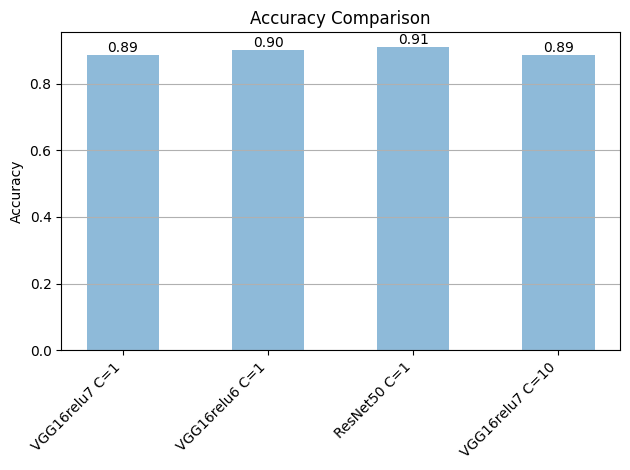

In [33]:
labels = ['VGG16relu7 C=1', 'VGG16relu6 C=1', 'ResNet50 C=1', 'VGG16relu7 C=10']
x_pos = np.arange(len(labels))
width = 0.5  # Adjust width for narrower bars


fig, ax = plt.subplots()
rects = ax.bar(x_pos, accs, width, align='center', alpha=0.5, ecolor='black', capsize=10)

# Add labels above each bar
for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 0.1),
                textcoords="offset points",
                ha='center', va='bottom')

# Customize the plot
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()